# Honor 2 视觉感知


## 

## 注意力机制

颜色 > 形状

In [78]:
x = '1281768756138976546984506985604982826762980985845822450985645894509845098094358590910302099059595957725646750506789045678845789809821677654876364908560912949686'
print('在如下文字中找到数字3的个数\n'+'\n'.join(x[i:i+40] for i in range(0,160,40)))
print('\n在如下文字中找到数字3的个数\n'+'\n'.join(\
    ''.join(map(lambda x:'\033[%sm%s\033[0m'%('1;30' if x=='3' else '36',x),x[i:i+40])) for i in range(0,160,40)))

在如下文字中找到数字3的个数
1281768756138976546984506985604982826762
9809858458224509856458945098450980943585
9091030209905959595772564675050678904567
8845789809821677654876364908560912949686

在如下文字中找到数字3的个数
1281768756138976546984506985604982826762
9809858458224509856458945098450980943585
9091030209905959595772564675050678904567
8845789809821677654876364908560912949686


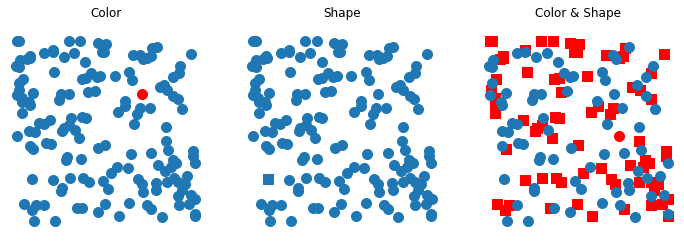

In [135]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2022)
N = 150
data = np.random.random((2, N))
plt.figure(figsize = (12, 4))
for i in range(1,4):
    plt.subplot(1,3,i)
    if i == 1:
        plt.scatter(data[0][:-1], data[1][:-1], s = 100)
        plt.scatter(data[0][-1], data[1][-1], s = 100, c = 'red')
    elif i == 2:
        plt.scatter(np.concatenate((data[0,:-3],data[0,-2:])), 
                    np.concatenate((data[1,:-3],data[1,-2:])), s = 100)
        plt.scatter(data[0][-3], data[1][-3], s = 100, marker = 's', c = '#1f77b4')
    elif i == 3:
        plt.scatter(data[0,1:N//2], data[1,1:N//2], s = 100, c = 'red', marker = 's')
        plt.scatter(data[0,N//2:], data[1,N//2:], s = 100, c = '#1f77b4', marker = 'o')
        plt.scatter(data[0,9], data[1,0], s = 100, c = 'red', marker = 'o')
    plt.xlim(0.1,.9)
    plt.ylim(-.1,1.1)
    plt.axis('equal')
    plt.axis('off')
    plt.title(('','Color','Shape','Color & Shape')[i])
plt.show()

## 格式塔理论

结构比元素更重要, 整体大于局部.

接近性 (proximity) > 相似性 (similarity) > 连续性 (continuity) , 闭合性 (closure) , 简单性 (similarity)

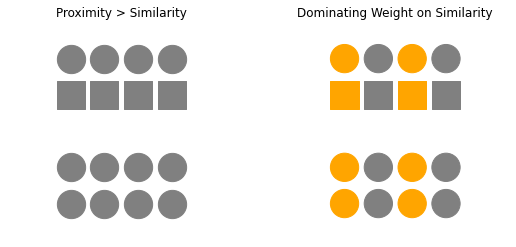

In [136]:
from matplotlib import pyplot as plt
import numpy as np
data = [np.linspace(0,.8,4).tolist()*3, [-.2]*4+[.1]*4+[1]*4]
data2 = [np.linspace(0,.8,4), [.7]*4]
plt.figure(figsize = (9, 4))
for i in range(1, 3):
    plt.subplot(1,2,i)
    if i == 1:
        plt.scatter(data[0], data[1],   marker='o', s = 800, c = 'gray')
        plt.scatter(data2[0], data2[1], marker='s', s = 800, c = 'gray')
    else:
        plt.scatter(data[0], data[1],   marker='o', s = 800, c = ['orange','gray']*6)
        plt.scatter(data2[0], data2[1], marker='s', s = 800, c = ['orange','gray']*2)
    plt.xlim(-.5,1.3)
    plt.ylim(-.5,1.3)
    plt.axis('off')
    plt.title(('Proximity > Similarity', 'Dominating Weight on Similarity')[i-1])
plt.show()

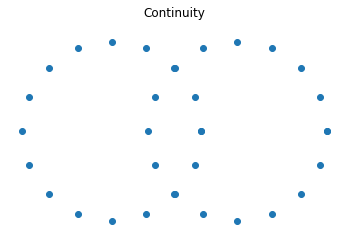

In [152]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, np.pi*2, 17)
data = [np.concatenate((np.cos(x)-.7, np.cos(x)+.7)), np.concatenate((np.sin(x), np.sin(x)))]
plt.scatter(data[0], data[1])
plt.axis('equal')
plt.axis('off')
plt.title('Continuity')
plt.show()

	    Closure


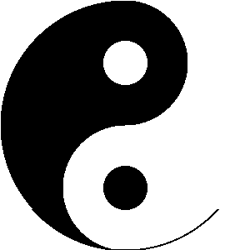

In [94]:
from matplotlib import pyplot as plt
import numpy as np
N = 300
X, coors = np.zeros((N,N)), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
X[:, N//2:] = 1
X = np.where(np.square(coors[0])+np.square(coors[1]-N/4)<N*N/16, 0, X)
X = np.where(np.square(coors[0])+np.square(coors[1]+N/4)<N*N/16, 1, X)
X = np.where(np.square(coors[0])+np.square(coors[1])<N*N/4, X, 1)
X = np.where(np.square(coors[0])+np.square(coors[1]-N/4)<N*N/128, 1, X)
X = np.where(np.square(coors[0])+np.square(coors[1]+N/4)<N*N/128, 0, X)
X = np.where((coors[1]<-N//3) & (np.abs(np.square(coors[0])+np.square(coors[1])-N*N/4)<N), 0, X)
X = np.array([X]*3 + [1. - X]).transpose((1,2,0)) # to RGBA

from PIL import Image 
print('\t    Closure')
Image.fromarray((X * 255).astype('uint8')).resize((250,250))

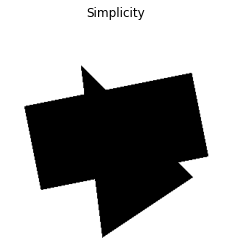

In [143]:
from matplotlib import pyplot as plt
import numpy as np
N = 300
X, coors = np.zeros((N,N)), np.meshgrid(np.arange(-N//2,N//2),np.arange(N//2,-N//2,-1))
X = np.where(coors[0]*8+coors[1]<-N, 1, X)
X = np.where(coors[0]+coors[1]>N/7, 1, X)
X = np.where(coors[0]-coors[1]*1.5>N/1.5, 1, X)
X = np.where(((coors[0]-coors[1]*5)<N) & ((coors[0]-coors[1]*5)>-N)\
            & ((coors[0]*5+coors[1])<2*N) & ((coors[0]*5+coors[1])>-2*N), 0, X)
plt.imshow(X, cmap = 'gray')
plt.axis('off')
plt.title('Simplicity')
plt.show()



## 视觉通道

符号标记 (marks) : 图形元素 (点线面等); 

视觉通道 (channels): 图形的表现方式 (位置,颜色,形状,大小等). 要将数据映射到视觉通道.

### 史蒂文心理物理强度定律

人类感知降序: 位置 > 长度 > 角度 / 斜度 > 大小 > 体积 > 颜色 / 亮度.

* 数值型: 位置, [长度, 角度, 斜度, 面积, 体积], [密度, 饱和度, 色调, 纹理, 连接关系, 包含关系], 形状
* 有序型: 位置, [密度, 饱和度, 色调, 纹理, 连接关系, 包含关系], [长度, 角度, 斜度, 面积, 体积], 形状
* 类别型: 位置, [色调, 纹理, 连接关系, 包含关系], [密度, 饱和度], 形状, [长度, 角度, 斜度, 面积, 体积]

其它影响因素: 对齐、框架、距离  


#### 位置

缺点: 位置常常被占用 (如地图), 数据太多时遮挡看不清.

#### 长度 / 尺寸

一维 > 二维 (面积) > 三维 (体积)

#### 亮度 / 饱和度

#### 颜色

缺点: 色盲 / 能区分的颜色种类有限
